In [1]:
import pyarrow.parquet as pq
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


ModuleNotFoundError: No module named 'seaborn'

label:0 : Chesterton, G. K. (Gilbert Keith)    
label:1 : Christie, Agatha    
label:2 : Doyle, Arthur Conan    
label:3 : Leblanc, Maurice   

In [2]:
figsize = (8, 5)

authors = ['G.K', 'Christie', 'Doyle', 'Leblanc']

def create_confusion_matrix(file_path, normalize='true'):
    """
    Create and visualize a confusion matrix from a DataFrame with Prediction and Actual columns.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'Pred' and 'label' columns
    
    Returns:
    tuple: Confusion matrix array and visualization
    """
    if normalize == 'true':
        fmt = '.2f'
    else:
        fmt = 'd'

    table = pq.read_table(file_path)

    # Convert to pandas DataFrame
    df = table.to_pandas()
    df = df.astype(int)
    columns = df.columns

    # Create confusion matrix
    cm = confusion_matrix(df[columns[1]], df[columns[0]],normalize=normalize)
    
    # Create a heatmap visualization
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', 
                xticklabels=authors,
                yticklabels=authors)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    
    # Print classification report for additional metrics
    print(classification_report(df['label'], df['pred']))
    
    return cm, plt

In [3]:
def plot_roc_curve(file_path):
    """
    Plot ROC curve and calculate AUC for the given file path.
    
    Parameters:
    file_path (str): Path to the parquet file containing 'pred' and 'label' columns
    
    Returns:
    None
    """
    table = pq.read_table(file_path)
    df = table.to_pandas()
    df = df.astype(int)
    columns = df.columns
    
    # Binarize the labels for multiclass classification
    classes = sorted(df[columns[1]].unique())
    y_test = label_binarize(df[columns[1]], classes=classes)
    y_score = label_binarize(df[columns[0]], classes=classes)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def compute_macro_average_auc(file_path):
    """
    Compute macro-average AUC for the given file path using One-vs-the-Rest (OvR) technique.
    
    Parameters:
    file_path (str): Path to the parquet file containing 'pred' and 'label' columns
    
    Returns:
    float: Macro-average AUC
    """
    table = pq.read_table(file_path)
    df = table.to_pandas()
    df = df.astype(int)
    columns = df.columns
    
    # Binarize the labels for multiclass classification
    classes = sorted(df[columns[1]].unique())
    y_test = label_binarize(df[columns[1]], classes=classes)
    y_score = label_binarize(df[columns[0]], classes=classes)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute macro-average AUC
    macro_average_auc = sum(roc_auc.values()) / len(classes)
    
    return macro_average_auc

In [5]:
def generate_plots_metrics(file_path):
    """
    Generate confusion matrix, ROC curve, and macro-average AUC plots and metrics for the given file path.
    
    Parameters:
    file_path (str): Path to the parquet file containing 'pred' and 'label' columns
    
    Returns:
    None
    """
    cm, _ = create_confusion_matrix(file_path)
    macro_average_auc = compute_macro_average_auc(file_path)
    
    print(f'Macro-average AUC: {macro_average_auc:.2f}')
    plot_roc_curve(file_path)
    

              precision    recall  f1-score   support

           0       0.85      0.59      0.70     14020
           1       0.81      0.78      0.80     24304
           2       0.40      0.50      0.44      5253
           3       0.81      0.88      0.84     47684

    accuracy                           0.79     91261
   macro avg       0.72      0.69      0.70     91261
weighted avg       0.79      0.79      0.79     91261

Macro-average AUC: 0.80


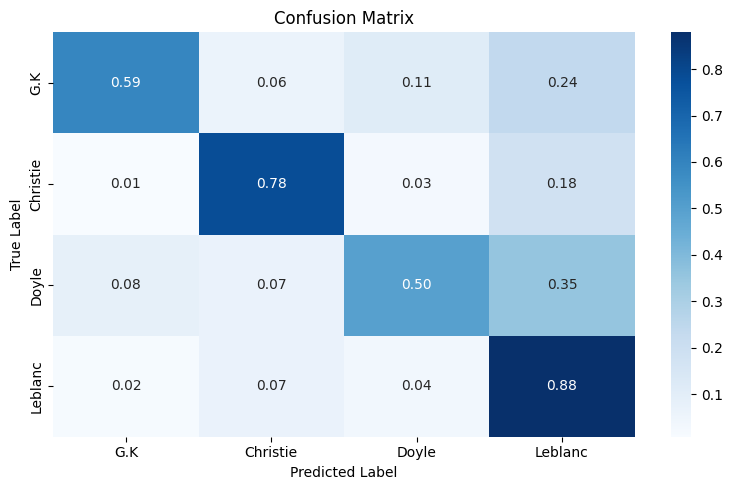

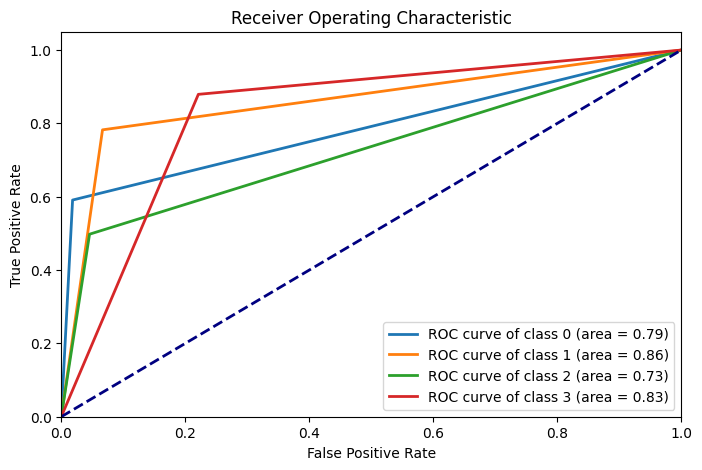

In [6]:
generate_plots_metrics(file_path=r'D:\Github\524Project-Group11\proj2\primary_author_results\transformer_preds_and_labels.parquet')

              precision    recall  f1-score   support

           0       0.29      0.21      0.24     11898
           1       0.13      0.00      0.00      2286
           2       0.54      0.83      0.66     24309
           3       0.00      0.00      0.00      7146

    accuracy                           0.49     45639
   macro avg       0.24      0.26      0.22     45639
weighted avg       0.37      0.49      0.41     45639

Macro-average AUC: 0.51


d:\Github\524Project-Group11\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Github\524Project-Group11\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Github\524Project-Group11\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


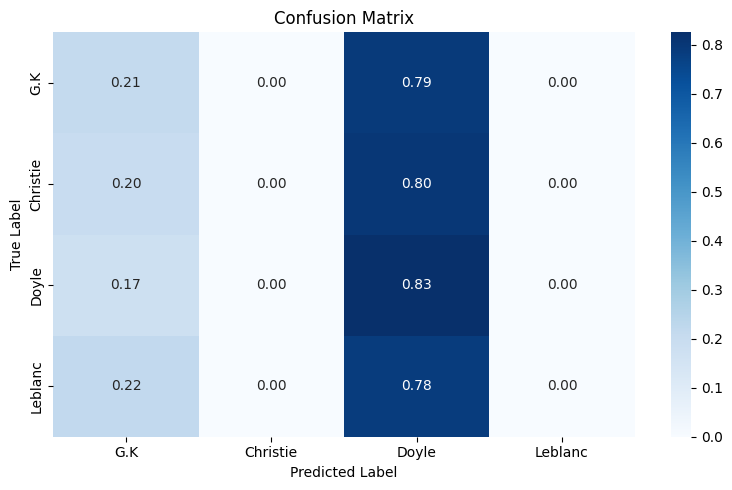

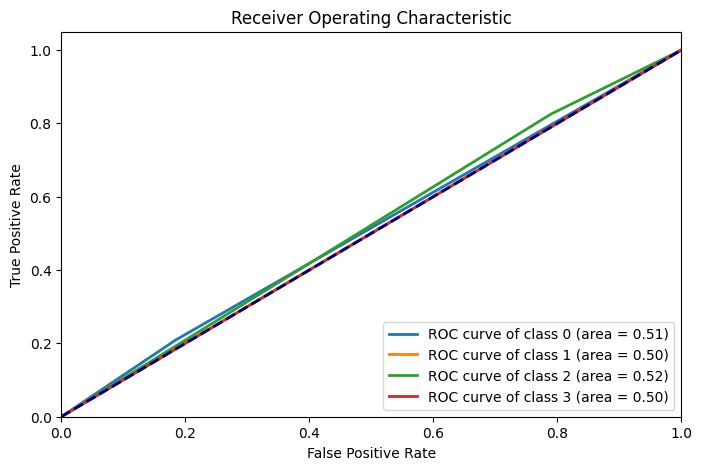

In [7]:
generate_plots_metrics(file_path=r'D:\Github\524Project-Group11\proj2\primary_author_results\lstm_preds_and_labels.parquet')

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      7932
           1       0.00      0.00      0.00      1524
           2       0.51      1.00      0.68     12465
           3       0.00      0.00      0.00      2382

    accuracy                           0.51     24303
   macro avg       0.25      0.25      0.17     24303
weighted avg       0.43      0.51      0.35     24303

Macro-average AUC: 0.50


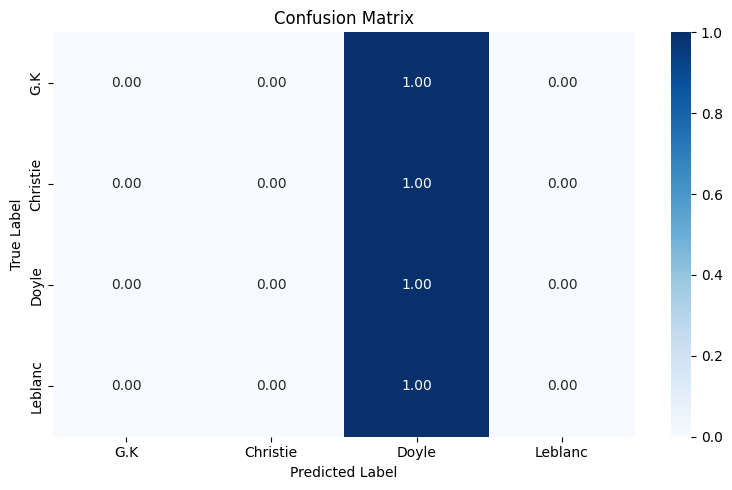

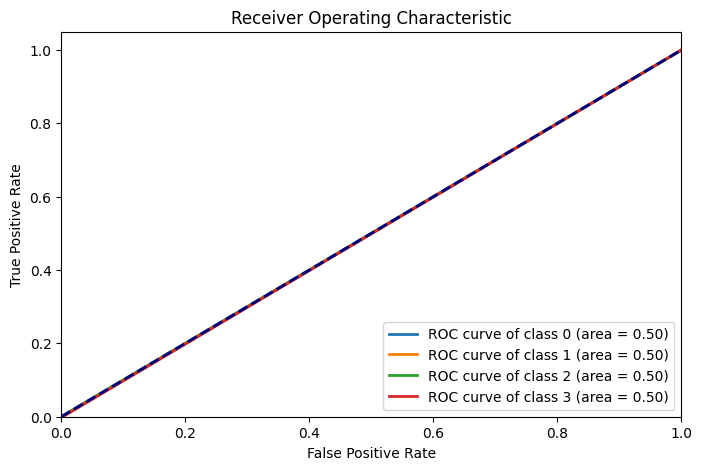

In [8]:
generate_plots_metrics(file_path=r'D:\Github\524Project-Group11\proj2\primary_author_results\svm_preds_and_labels.parquet')